## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from scipy.stats import randint, uniform
import joblib
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## **Load Dataset**

In [2]:
df = pd.read_csv('/content/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.shape

(569, 32)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [9]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
df.nunique()

,0
id,569
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


In [11]:
df.duplicated().sum()

np.int64(0)

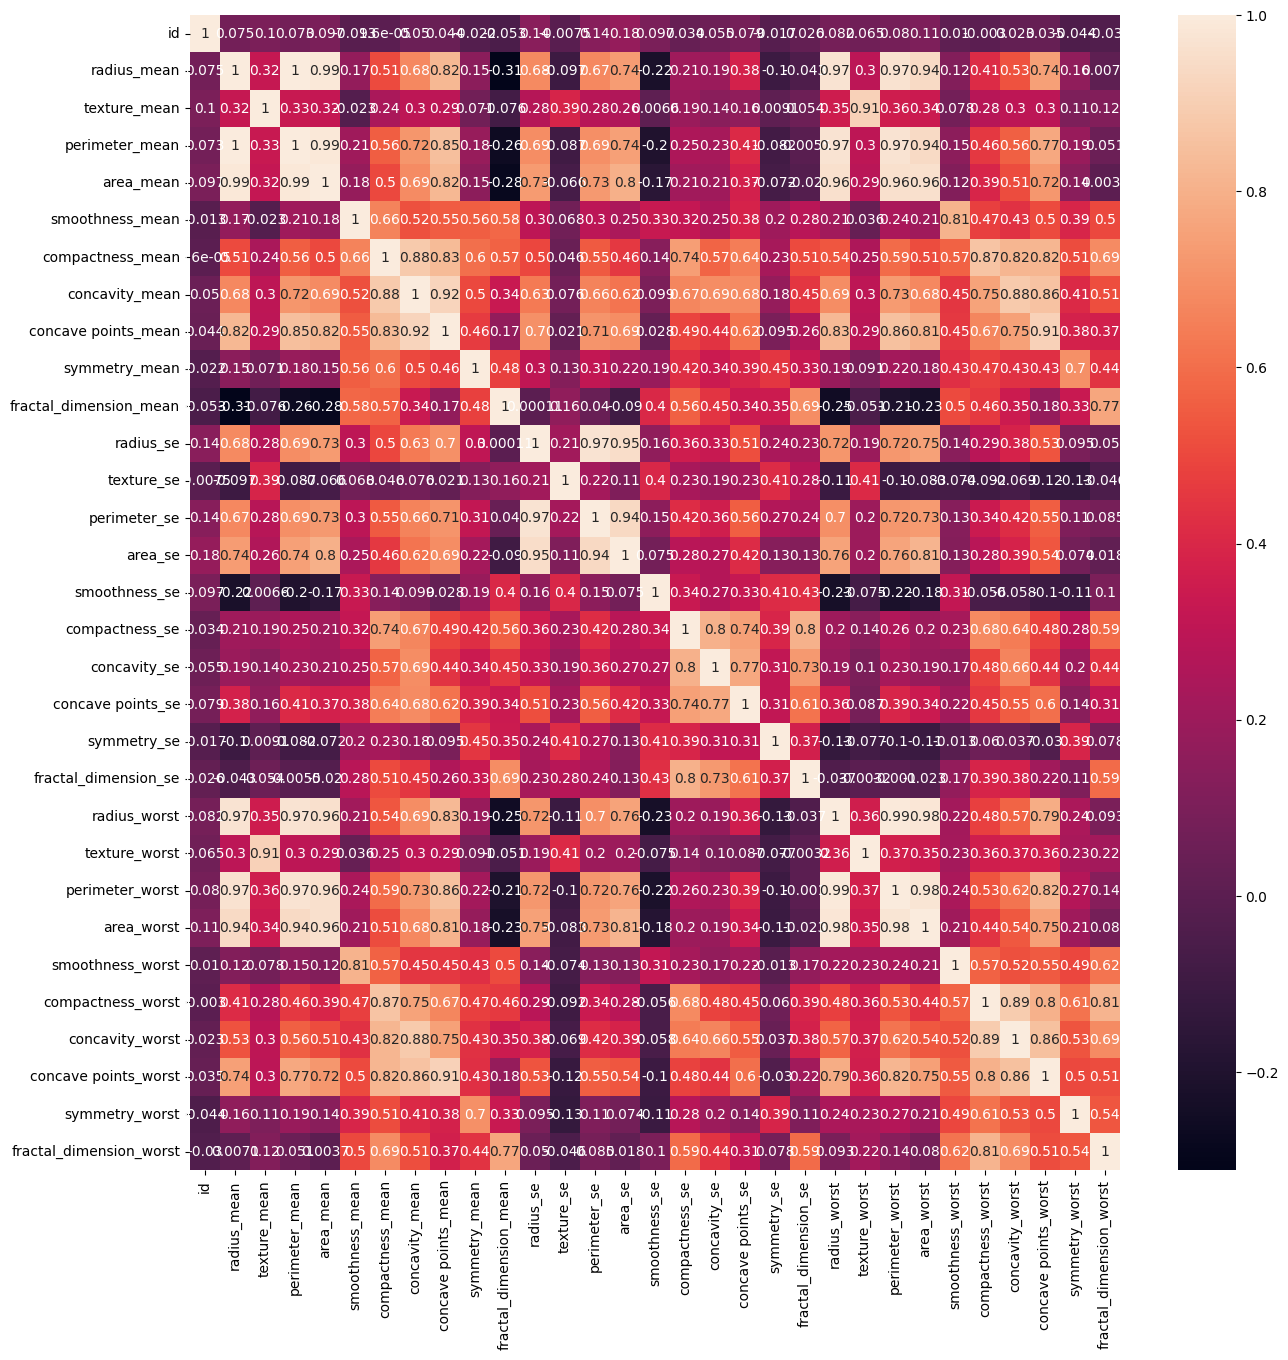

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


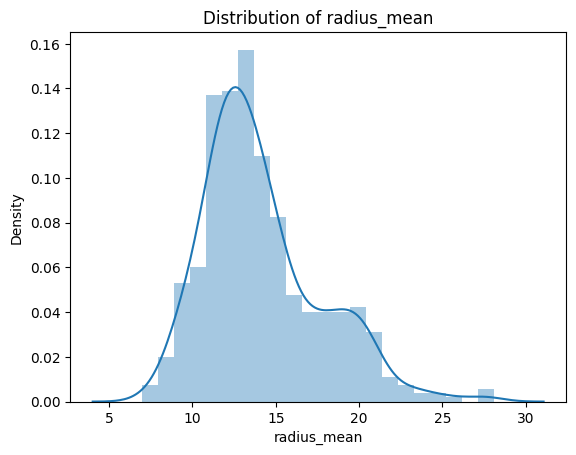

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


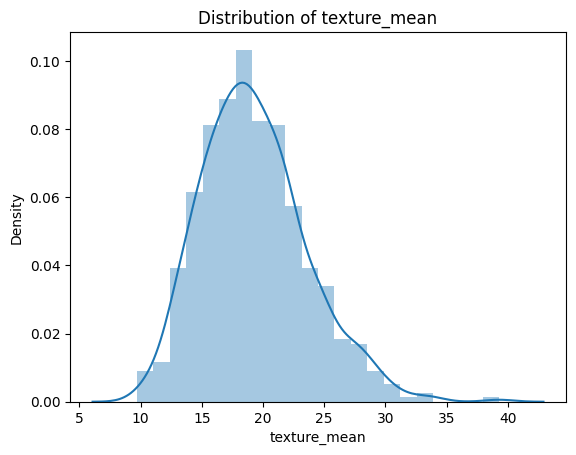

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


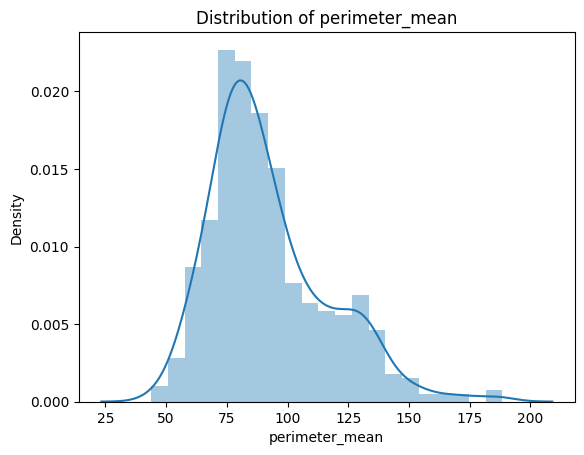

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


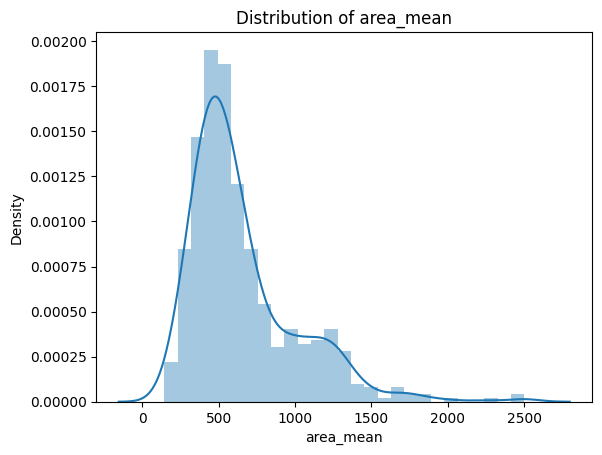

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


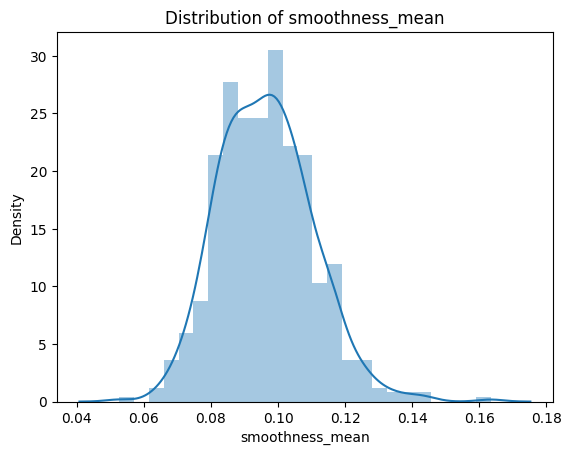

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


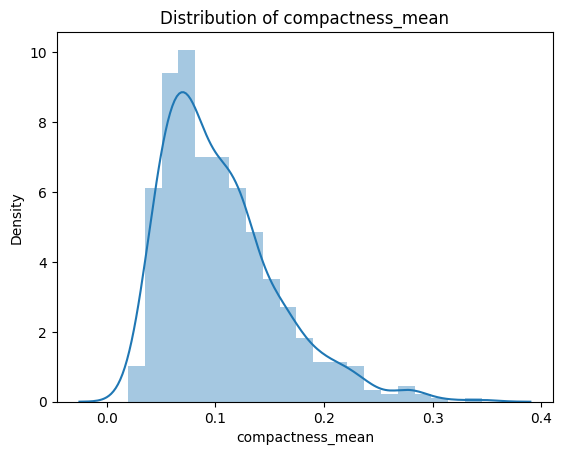

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


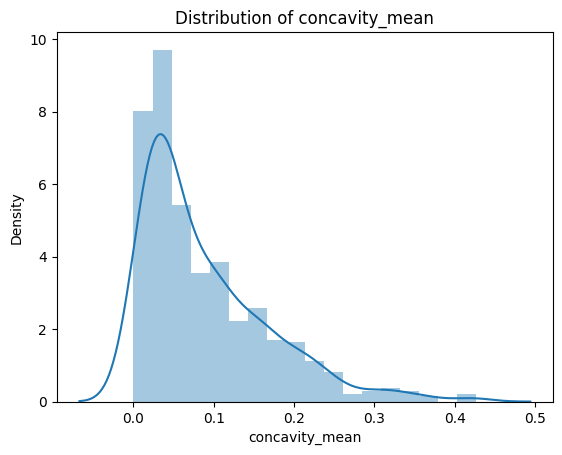

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


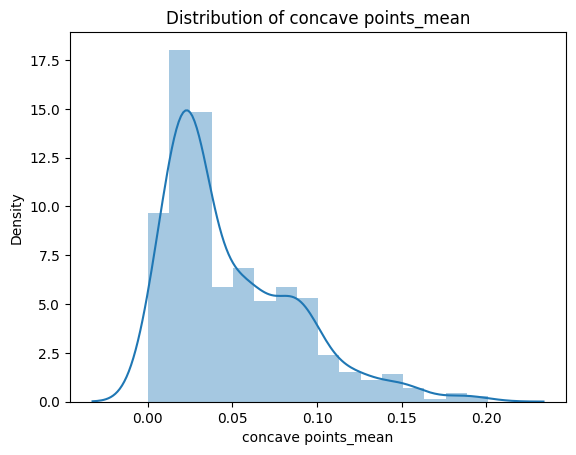

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


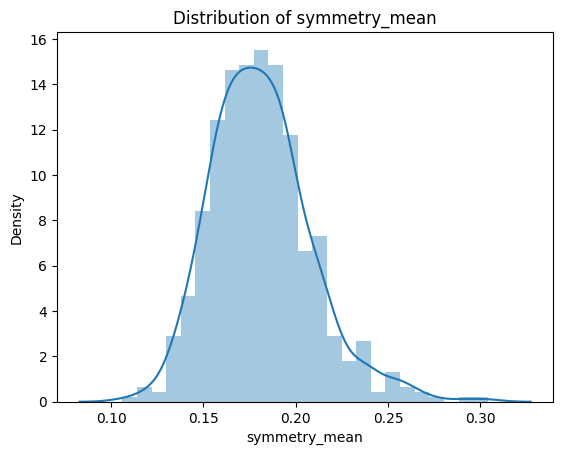

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


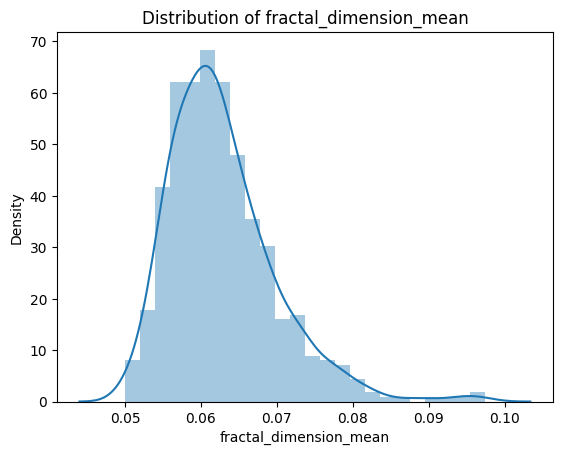

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


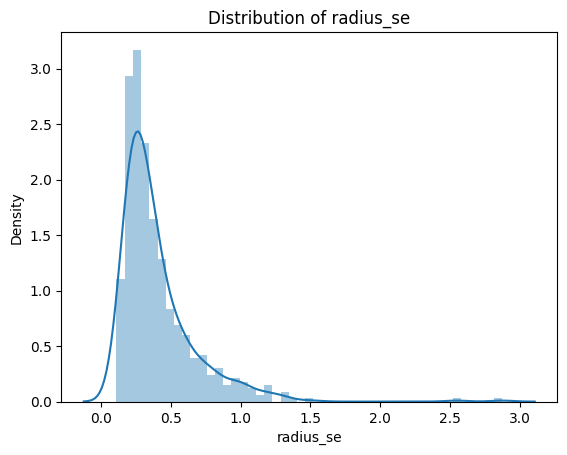

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


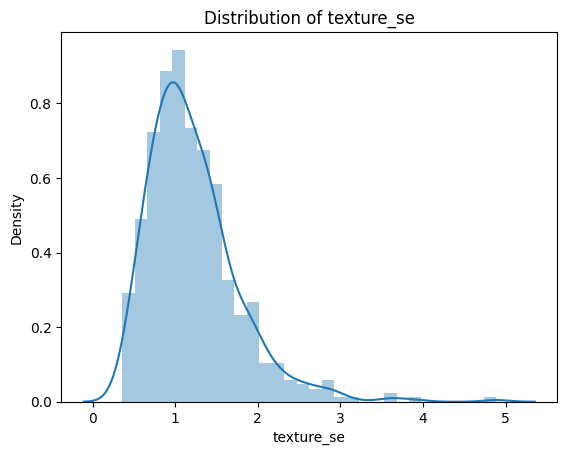

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


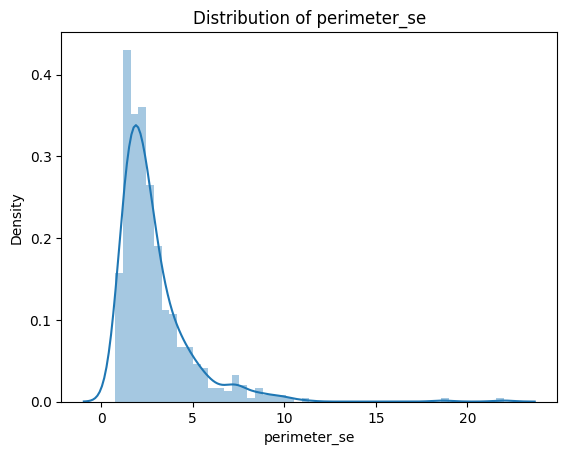

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


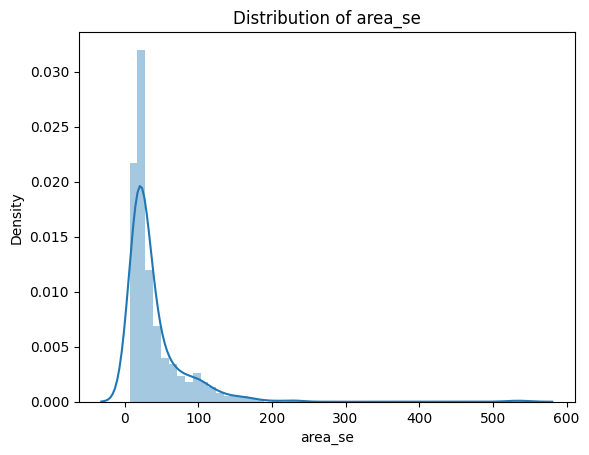

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


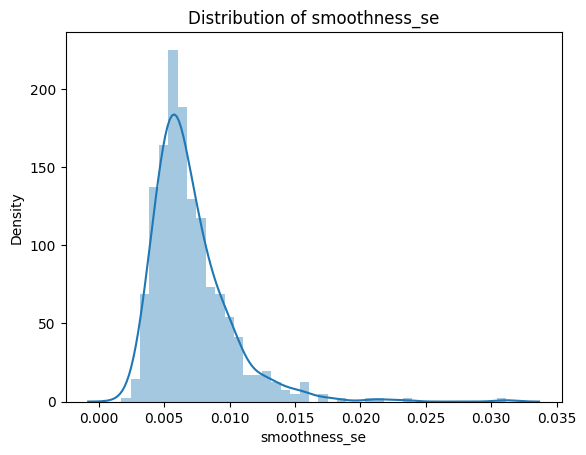

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


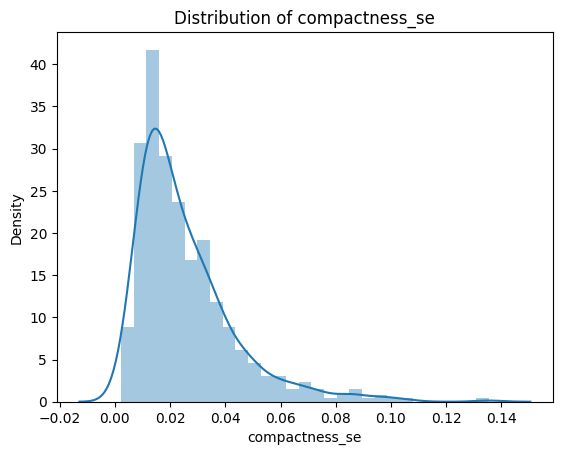

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


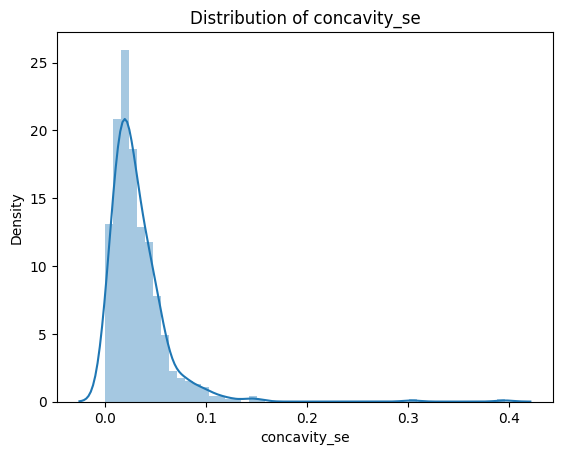

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


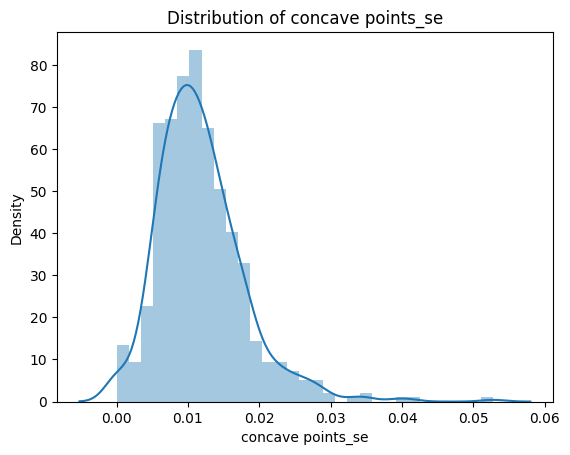

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


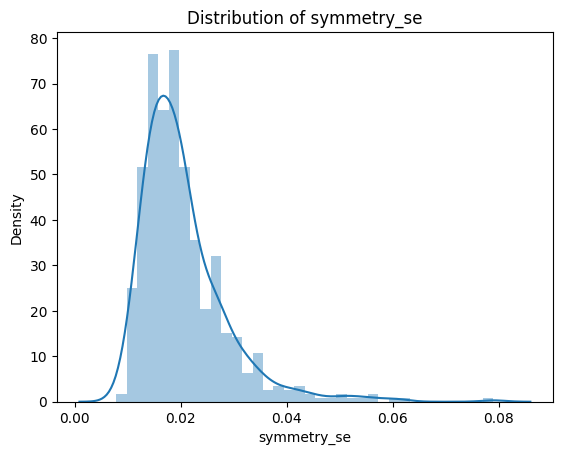

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


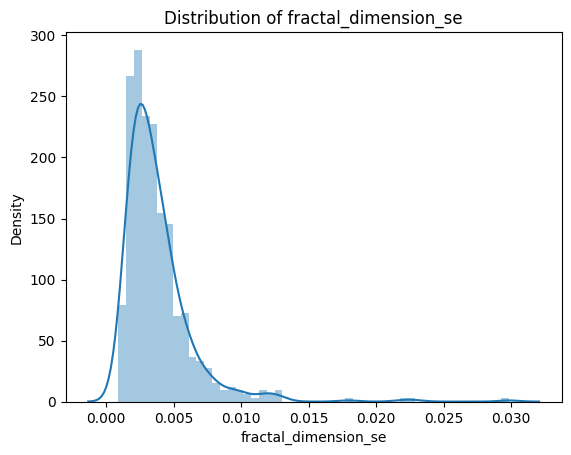

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


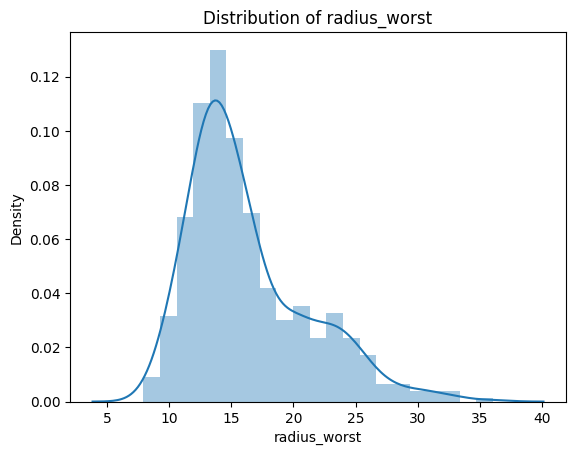

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


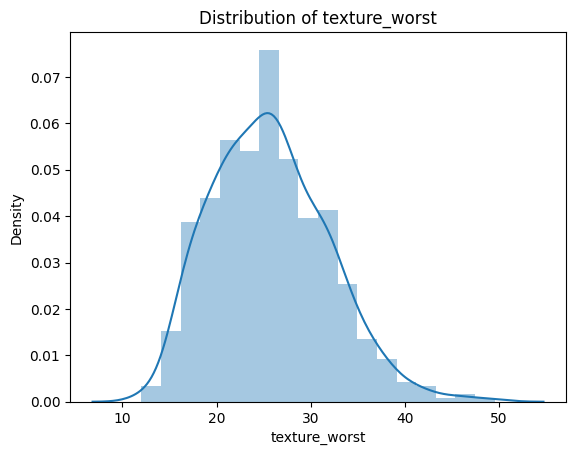

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


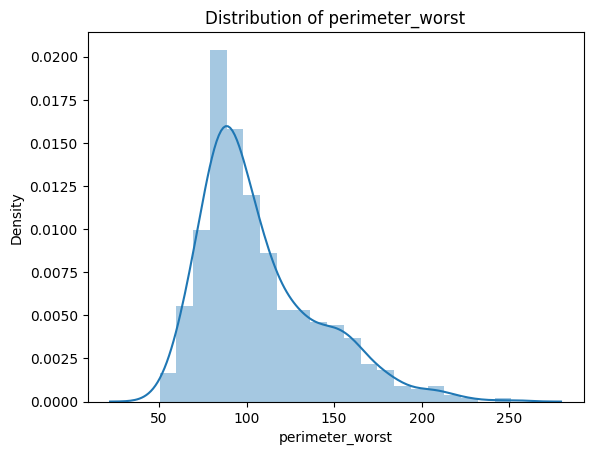

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


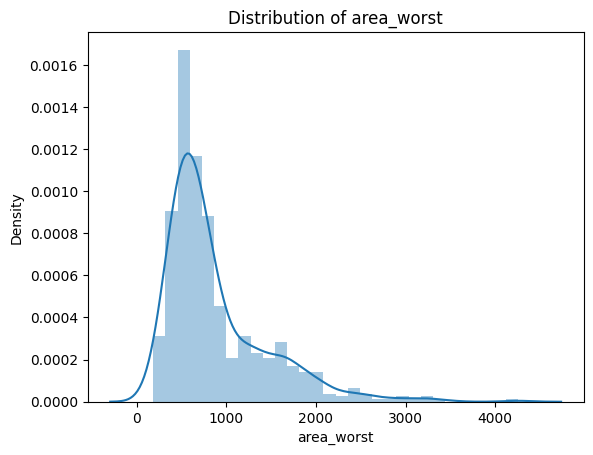

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


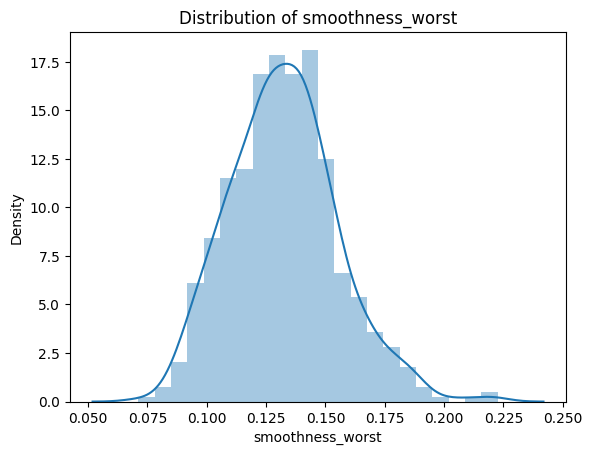

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


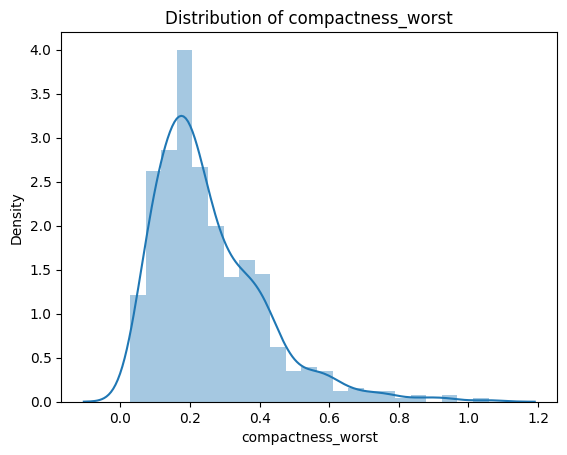

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


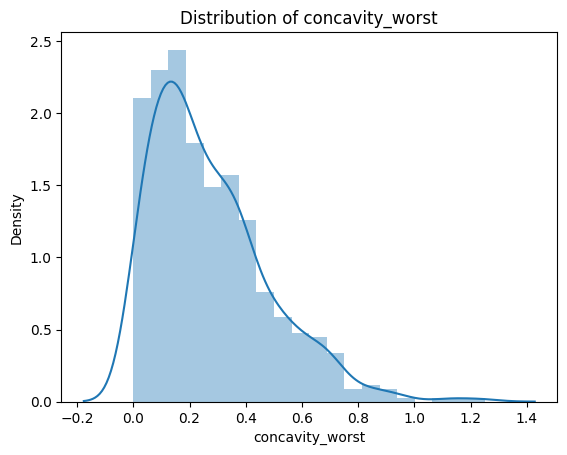

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


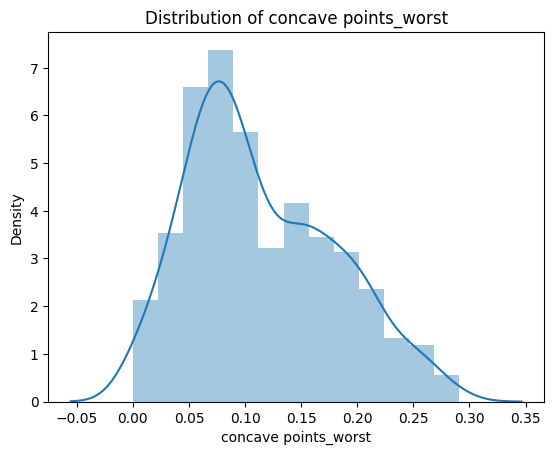

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


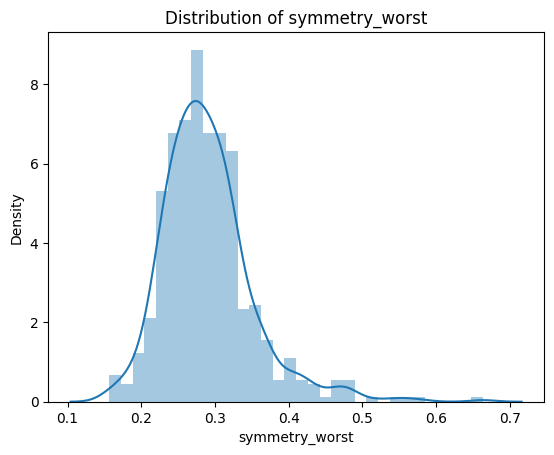

/tmp/ipython-input-13-280721219.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


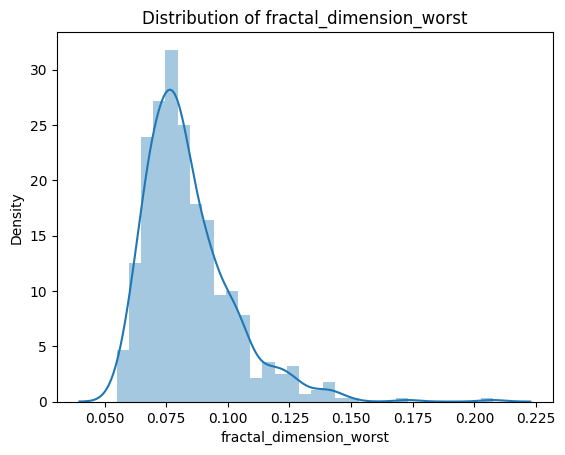

In [13]:
for column in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']:
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

## **Preprocessing**

In [14]:
# Rename kolom dengan spasi ke format snake_case
df.rename(columns={
    'concave points_mean': 'concave_points_mean',
    'concave points_worst': 'concave_points_worst'
}, inplace=True)


# Simpan ulang DataFrame ke file CSV
df.to_csv('breast_cancer.csv', index=False)

In [15]:
df = pd.read_csv('/content/breast_cancer.csv')

In [16]:
df = df.drop('id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [17]:
# Simpan kolom diagnosis sebelum filtering
diagnosis_col = df['diagnosis']

In [18]:
# Identifikasi kolom numerik tanpa diagnosis
numerical_cols = df.select_dtypes(include='number').columns.tolist()
if 'diagnosis' in numerical_cols:
    numerical_cols.remove('diagnosis')

In [19]:
# Terapkan LOF untuk deteksi outlier
def remove_outliers_lof(df, features, contamination=0.05):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    # Fit LOF dan ambil mask inlier (nilai 1 adalah inlier, -1 adalah outlier)
    mask = lof.fit_predict(df[features])

    # Filter hanya inlier (mask == 1)
    df_clean = df[mask == 1].copy()
    return df_clean

In [20]:
# Terapkan fungsi LOF
df = remove_outliers_lof(df, numerical_cols, contamination=0.05)

In [21]:
# Gabungkan kembali diagnosis (pastikan urutan index cocok)
df['diagnosis'] = diagnosis_col.loc[df.index]

# Hapus baris yang diagnosis-nya NaN (jika ada)
df.dropna(subset=['diagnosis'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Tampilkan shape
print("Shape setelah hapus outlier (LOF):", df.shape)

Shape setelah hapus outlier (LOF): (540, 31)


In [22]:
label_encoder = LabelEncoder()

# Encode the 'diagnosis' column, B=0 (jinak), M=1 (ganas)
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'].map({'B': 0, 'M': 1}))

# Drop the original 'diagnosis' column and rename the encoded column
df = df.drop('diagnosis', axis=1)
df = df.rename(columns={'diagnosis_encoded': 'diagnosis'})

# Verifikasi hasil
print("Hasil label encoding:")
print(df['diagnosis'].value_counts())
df.head()

Hasil label encoding:
diagnosis
0    353
1    187
Name: count, dtype: int64


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
4,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1


## **Korelasi with Target**

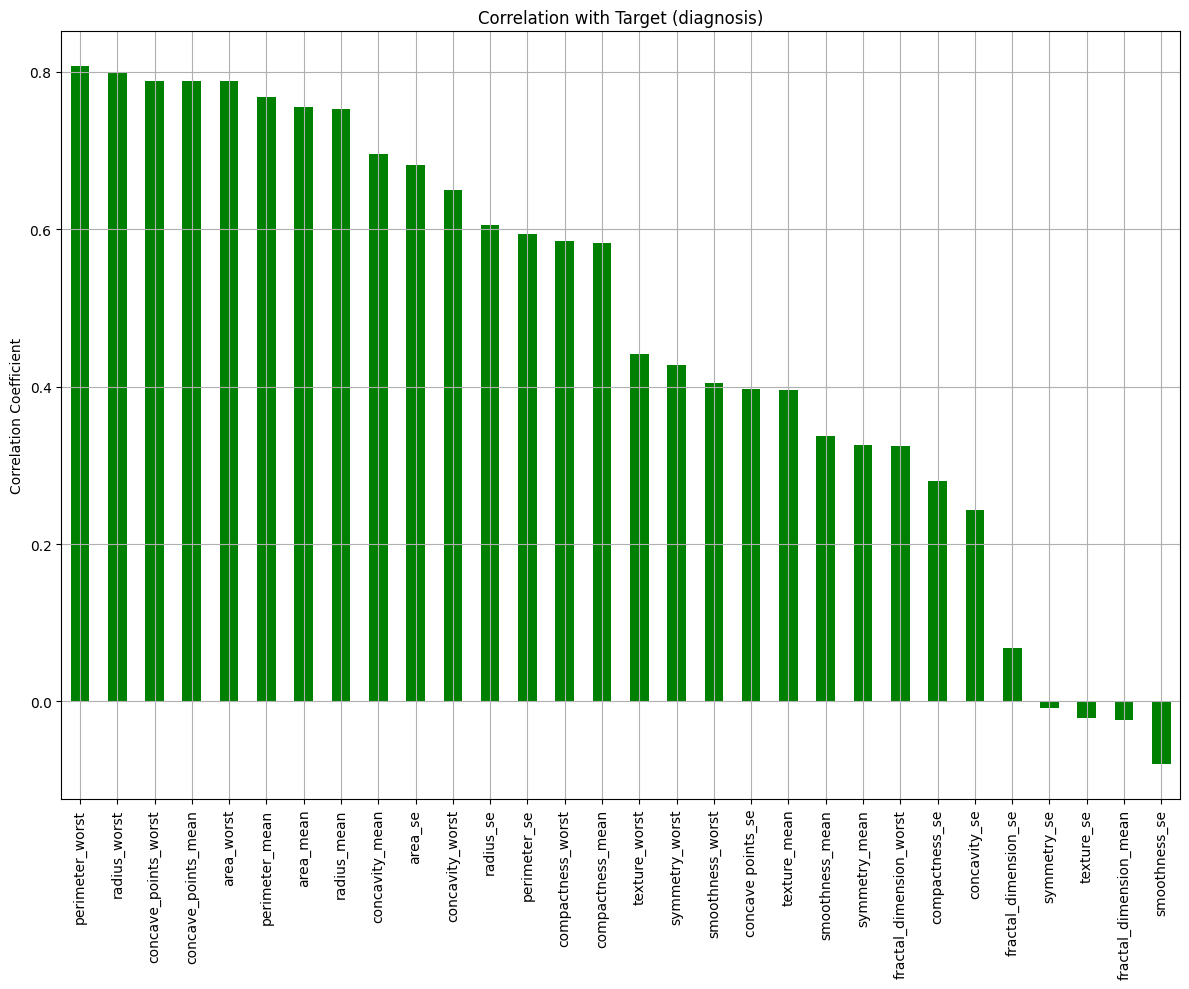

In [23]:
# Korelasi setiap fitur dengan target diagnosis
correlation_with_target = df.drop('diagnosis', axis=1).corrwith(df['diagnosis'])

# Visualisasi korelasi
plt.figure(figsize=(12, 10))
correlation_with_target.sort_values(ascending=False).plot(
    kind='bar',
    color='green',
    title='Correlation with Target (diagnosis)',
    grid=True
)
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## **Pair Plot**

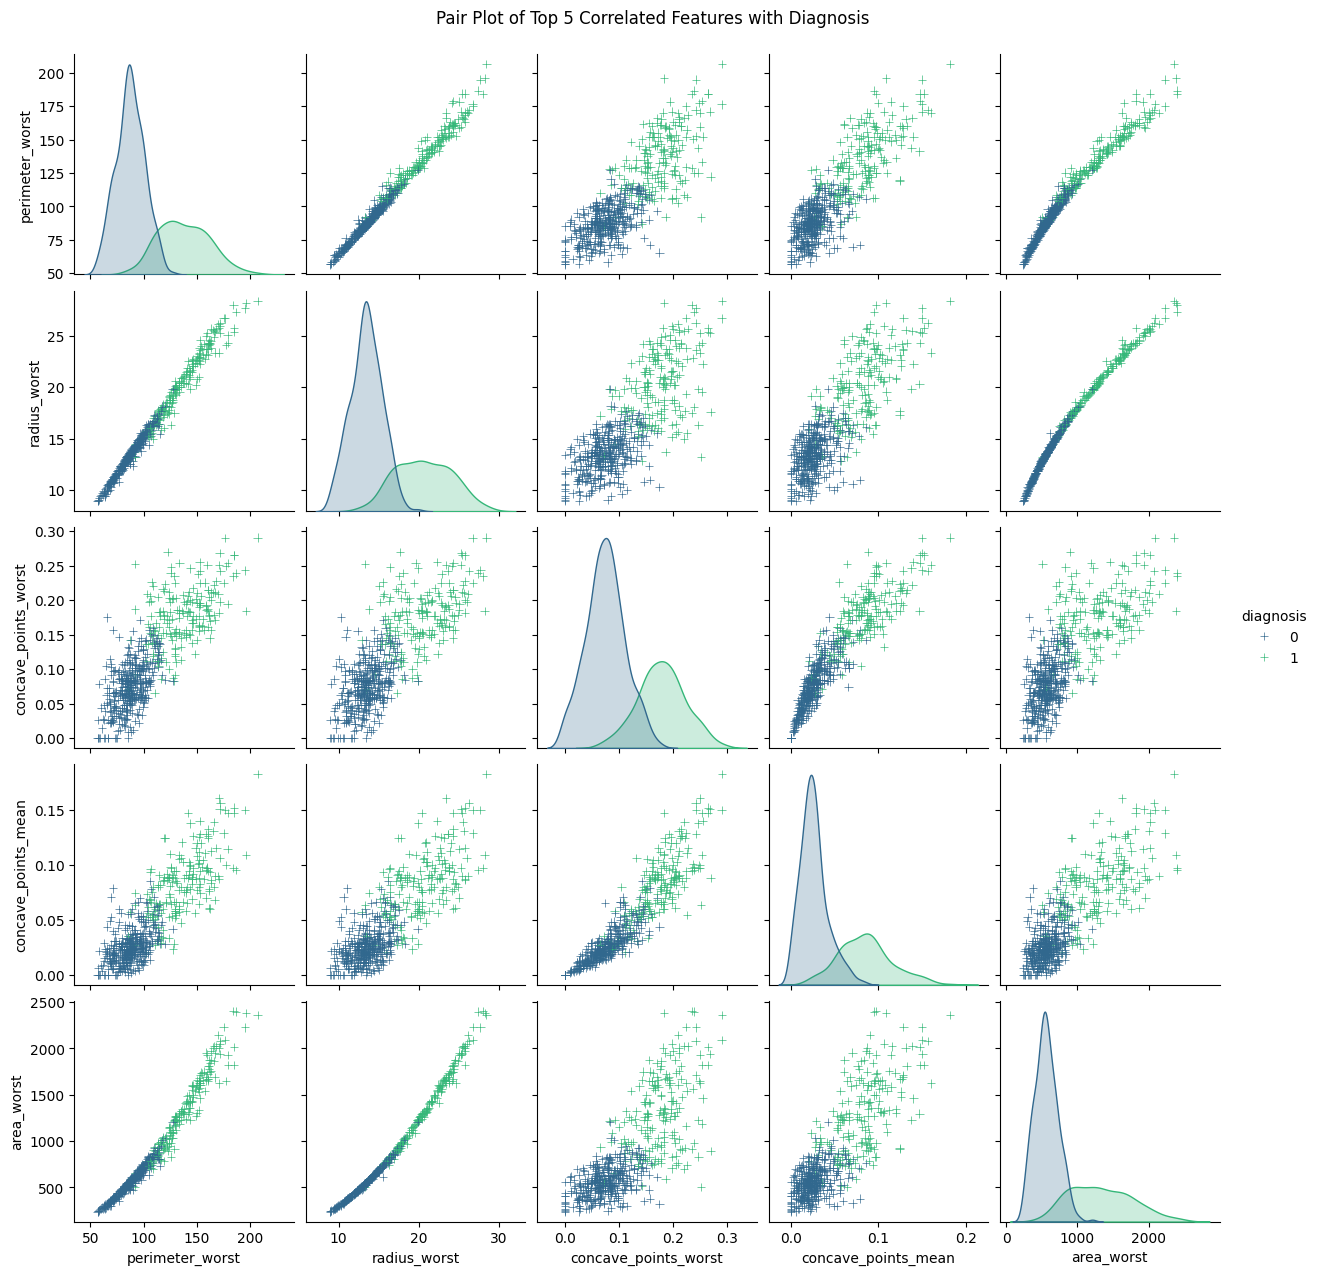

In [24]:
# Ambil 5 fitur dengan korelasi absolut tertinggi terhadap diagnosis
corr_features = df.drop('diagnosis', axis=1).corrwith(df['diagnosis']).abs().sort_values(ascending=False).head(5).index.tolist()

# Tambahkan kolom diagnosis untuk pairplot
corr_features.append('diagnosis')

# Pair plot
sns.pairplot(df[corr_features],
             diag_kind="kde",
             markers="+",
             hue="diagnosis",
             palette='viridis')
plt.suptitle('Pair Plot of Top 5 Correlated Features with Diagnosis', y=1.02)
plt.show()

## **Split Data**

In [25]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

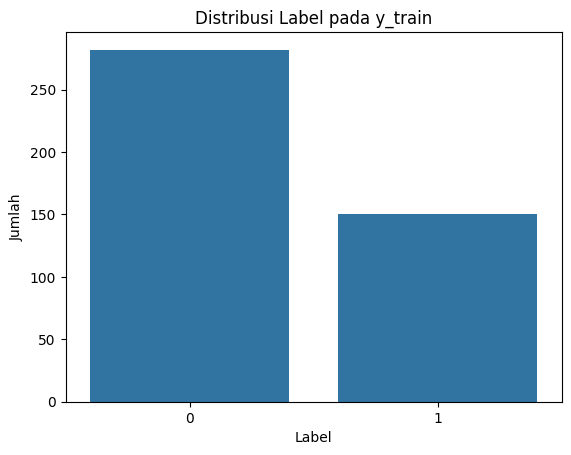

In [27]:
sns.countplot(x=y_train)
plt.title("Distribusi Label pada y_train")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

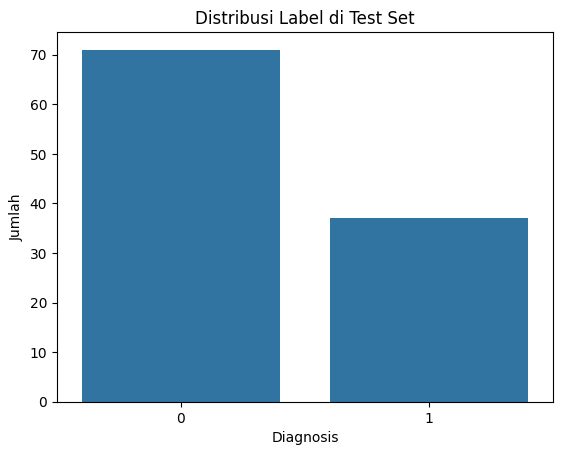

In [28]:
sns.countplot(x=y_test)
plt.title("Distribusi Label di Test Set")
plt.xlabel("Diagnosis")
plt.ylabel("Jumlah")
plt.show()

## **Feature Selection**

## **Feature Selection menggunakan Filter, ANOVA F-test Model LightGBM & MLP**

In [29]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Cek fitur yang terpilih
selected_features = X_train.columns[selector.get_support()]
print("Fitur terpilih:", list(selected_features))

Fitur terpilih: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave_points_mean', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave_points_worst']


## **SEBELUM MENGGUNAKAN SMOTE & HYPERPARAMETER TUNNING GRIDSEARCH**

## **Modeling**

## **Modeling LightGBM**

In [30]:
# Inisialisasi dan latih model LGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_selected, y_train)

[LightGBM] [Info] Number of positive: 150, number of negative: 282
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1441
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347222 -> initscore=-0.631272
[LightGBM] [Info] Start training from score -0.631272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(random_state=42)

In [31]:
# Membuat prediksi pada data tes
y_pred_lgbm = lgbm.predict(X_test_selected)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [32]:
# Menampilkan Laporan Klasifikasi (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))

# Menampilkan Akurasi
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"Akurasi: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.89      0.92      0.91        37

    accuracy                           0.94       108
   macro avg       0.93      0.93      0.93       108
weighted avg       0.94      0.94      0.94       108

Akurasi: 0.9352



Confusion Matrix:


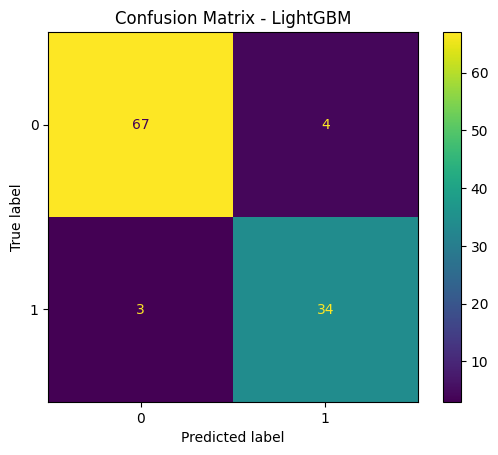

In [33]:
# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_lgbm),
    display_labels=['0', '1']
).plot(cmap=plt.cm.viridis)
plt.title("Confusion Matrix - LightGBM")
plt.show()

In [34]:
# Inisialisasi StratifiedKFold untuk menjaga proporsi kelas
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Siapkan list untuk menyimpan skor akurasi dari setiap fold
kfold_accuracy_scores = []

print(f"\n--- Memulai {n_splits}-Fold Cross-Validation untuk LightGBM ---")
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    # Bagi data untuk fold saat ini
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Lakukan seleksi fitur HANYA pada data latih fold ini
    selector_fold = SelectKBest(score_func=f_classif, k=10)
    X_train_fold_selected = selector_fold.fit_transform(X_train_fold, y_train_fold)
    X_val_fold_selected = selector_fold.transform(X_val_fold)

    # Inisialisasi dan latih model
    lgbm_fold = LGBMClassifier(random_state=42)
    lgbm_fold.fit(X_train_fold_selected, y_train_fold)

    # Prediksi dan hitung akurasi untuk fold ini
    y_pred_fold = lgbm_fold.predict(X_val_fold_selected)
    acc = accuracy_score(y_val_fold, y_pred_fold)
    kfold_accuracy_scores.append(acc)

    print(f"Akurasi Fold {fold+1}: {acc:.4f}")


--- Memulai 5-Fold Cross-Validation untuk LightGBM ---
[LightGBM] [Info] Number of positive: 149, number of negative: 283
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1438
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344907 -> initscore=-0.641501
[LightGBM] [Info] Start training from score -0.641501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 150, number of negative: 282
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1441
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347222 -> initscore=-0.631272
[LightGBM] [Info] Start training from score -0.631272
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [35]:
# Tampilkan hasil rata-rata dan standar deviasi dari K-Fold
print("\n--- Hasil Akhir K-Fold Cross-Validation ---")
print(f"Rata-rata Akurasi: {np.mean(kfold_accuracy_scores):.4f}")
print(f"Standar Deviasi Akurasi: {np.std(kfold_accuracy_scores):.4f}")


--- Hasil Akhir K-Fold Cross-Validation ---
Rata-rata Akurasi: 0.9370
Standar Deviasi Akurasi: 0.0214


## **MODELING MLP**

In [36]:
# Inisialisasi StandardScaler
scaler_mlp = StandardScaler()
X_train_scaled = scaler_mlp.fit_transform(X_train_selected)
X_test_scaled = scaler_mlp.transform(X_test_selected)

In [37]:
mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50))
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [38]:
# Prediksi pada data tes
y_pred_mlp = mlp.predict(X_test_scaled)

In [39]:
# Menampilkan Laporan Klasifikasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

# Menampilkan Akurasi
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Akurasi: {accuracy_mlp:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.92      0.97      0.95        37

    accuracy                           0.96       108
   macro avg       0.95      0.97      0.96       108
weighted avg       0.96      0.96      0.96       108

Akurasi: 0.9630



Confusion Matrix:


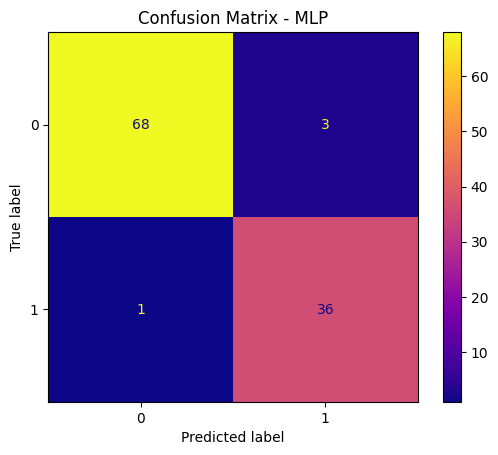

In [40]:
# Menampilkan Confusion Matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_mlp),
    display_labels=['0', '1']
).plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix - MLP")
plt.show()

In [41]:
# Inisialisasi StratifiedKFold
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Siapkan list untuk menyimpan skor akurasi
kfold_accuracy_scores_mlp = []

print(f"\n--- Memulai {n_splits}-Fold Cross-Validation untuk MLP ---")
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    # Bagi data untuk fold saat ini
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # a. Seleksi fitur pada data latih fold ini
    selector_fold = SelectKBest(score_func=f_classif, k=10)
    X_train_fold_selected = selector_fold.fit_transform(X_train_fold, y_train_fold)
    X_val_fold_selected = selector_fold.transform(X_val_fold)

    # b. Scaling pada data latih fold ini
    scaler_fold = StandardScaler()
    X_train_fold_scaled = scaler_fold.fit_transform(X_train_fold_selected)
    X_val_fold_scaled = scaler_fold.transform(X_val_fold_selected)

    # Inisialisasi dan latih model
    mlp_fold = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50))
    mlp_fold.fit(X_train_fold_scaled, y_train_fold)

    # Prediksi dan hitung akurasi
    y_pred_fold = mlp_fold.predict(X_val_fold_scaled)
    acc = accuracy_score(y_val_fold, y_pred_fold)
    kfold_accuracy_scores_mlp.append(acc)

    print(f"Akurasi Fold {fold+1}: {acc:.4f}")


--- Memulai 5-Fold Cross-Validation untuk MLP ---
Akurasi Fold 1: 0.9259
Akurasi Fold 2: 0.9444
Akurasi Fold 3: 0.9537
Akurasi Fold 4: 0.9722
Akurasi Fold 5: 0.9537


In [42]:
# Tampilkan hasil rata-rata dan standar deviasi
print("\n--- Hasil Akhir K-Fold Cross-Validation ---")
print(f"Rata-rata Akurasi MLP: {np.mean(kfold_accuracy_scores_mlp):.4f}")
print(f"Standar Deviasi Akurasi: {np.std(kfold_accuracy_scores_mlp):.4f}")


--- Hasil Akhir K-Fold Cross-Validation ---
Rata-rata Akurasi MLP: 0.9500
Standar Deviasi Akurasi: 0.0150


## **SETELAH MENGGUNAKAN SMOTE & HYPERPARAMETER TUNNING GRID SEARCH**

In [43]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)

## **MODELING LIGHTGBM**

In [44]:
# Inisialisasi model LGBM
lgbm = LGBMClassifier(random_state=42)

In [45]:
# Parameter grid untuk LGBM
param_grid_lgbm_adjusted = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves':[15,31],
}

In [46]:
# GridSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_lgbm = GridSearchCV(lgbm, param_grid_lgbm_adjusted, cv=5, scoring='f1', n_jobs=-1)
grid_lgbm.fit(X_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 282, number of negative: 282
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1881
[LightGBM] [Info] Number of data points in the train set: 564, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [15, 31]},
             scoring='f1')

In [47]:
# Evaluasi
y_pred_lgbm = grid_lgbm.predict(X_test_selected)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [48]:
y_proba_lgbm = grid_lgbm.predict_proba(X_test_selected)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [49]:
threshold = 0.6
y_pred_adjusted = (y_proba_lgbm >= threshold).astype(int)

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.90      0.97      0.94        37

    accuracy                           0.95       108
   macro avg       0.94      0.96      0.95       108
weighted avg       0.96      0.95      0.95       108

Akurasi: 0.9537


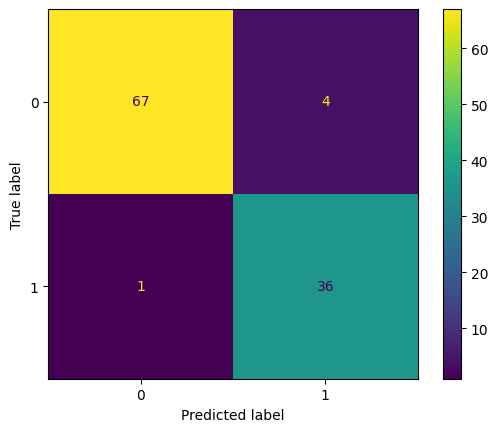

In [50]:
# Evaluasi dengan threshold baru
print("Classification Report : ")
print(classification_report(y_test, y_pred_adjusted))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_adjusted)).plot()
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"Akurasi: {accuracy:.4f}")

## **MODELING MLP**

In [51]:
# Buat pipeline yang terdiri dari scaler dan model MLP
pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42, max_iter=1000))
])
pipeline_mlp.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp', MLPClassifier(max_iter=1000, random_state=42))])

In [57]:
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(50, 50), (100,), (100, 50, 25)],
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
}

In [58]:
# Inisialisasi GridSearchCV dengan pipeline sebagai estimator
cv_mlp = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=cv_mlp, scoring='f1', n_jobs=-1)

In [59]:
# Latih GridSearchCV pada data resampled
grid_mlp.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(max_iter=1000,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'tanh', 'logistic'],
                         'mlp__alpha': [0.0001, 0.001, 0.01],
                         'mlp__hidden_layer_sizes': [(50, 50), (100,),
                                                     (100, 50, 25)],
                         'mlp__solver': ['adam', 'sgd']},
             scoring='f1')

In [60]:
print("\nParameter terbaik untuk MLP:", grid_mlp.best_params_)
print(f"Skor F1 cross-validation terbaik: {grid_mlp.best_score_:.4f}")


Parameter terbaik untuk MLP: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__solver': 'adam'}
Skor F1 cross-validation terbaik: 0.9614


In [61]:
y_proba_mlp = grid_mlp.predict_proba(X_test_selected)[:, 1]

In [62]:
threshold = 0.6
y_pred_mlp_adjusted = (y_proba_mlp >= threshold).astype(int)

In [63]:
# 6. Tampilkan Hasil Evaluasi
print("Classification Report : ")
print(classification_report(y_test, y_pred_mlp_adjusted))

accuracy_mlp = accuracy_score(y_test, y_pred_mlp_adjusted)
print(f"Akurasi: {accuracy_mlp:.4f}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.97      0.97      0.97        37

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108

Akurasi: 0.9815


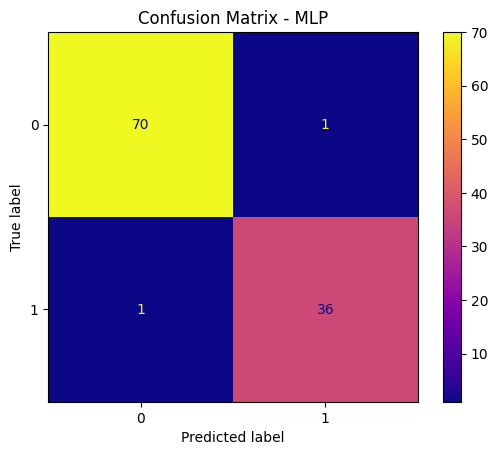

In [64]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp_adjusted)).plot(cmap=plt.cm.plasma)
plt.title("Confusion Matrix - MLP")
plt.show()

In [68]:
# Simpan pipeline ke file 'model_MLP_final.pkl'
joblib.dump(pipeline_mlp, 'MLP_model_final.pkl')

['MLP_model_final.pkl']

## **Testing**

In [69]:
import joblib
import numpy as np

# === 1. Load Model MLP Pipeline ===
# Model ini sudah termasuk scaler dan MLP
model_mlp = joblib.load('MLP_model_final.pkl')

# === 2. Siapkan Input Data (10 fitur terpilih) ===
# Menggunakan nilai yang sama untuk perbandingan
input_features = [
    14.5,   # radius_mean
    87.0,   # perimeter_mean
    600.0,  # area_mean
    0.12,   # concavity_mean
    0.10,   # concave points_mean
    40.0,   # area_se
    18.5,   # radius_worst
    120.0,  # perimeter_worst
    1000.0, # area_worst
    0.25    # concave points_worst
]

# Ubah ke array bentuk (1, 10) yang dibutuhkan model
input_array = np.array(input_features).reshape(1, -1)

# === 3. Prediksi label dan probabilitas ===
# Pipeline akan otomatis melakukan scaling sebelum prediksi
predicted_label = model_mlp.predict(input_array)[0]
predicted_proba = model_mlp.predict_proba(input_array)[0]

# === 4. Tampilkan hasil prediksi ===
label_names = ['Jinak (B)', 'Ganas (M)']  # 0 = B, 1 = M
print("Predicted Label:", label_names[predicted_label])
print("Probabilitas:")
for i, prob in enumerate(predicted_proba):
    print(f"  {label_names[i]}: {prob:.4f}")

Predicted Label: Ganas (M)
Probabilitas:
  Jinak (B): 0.0000
  Ganas (M): 1.0000


In [71]:
import joblib
import numpy as np

# === 1. Load Model MLP Pipeline ===
# Model ini sudah termasuk scaler dan MLP
model_mlp = joblib.load('MLP_model_final.pkl')

# === 2. Siapkan Input Data (10 fitur terpilih) ===
# Menggunakan nilai yang sama untuk perbandingan
input_features = [
    10.0,  # radius_mean
    50.0,  # perimeter_mean
    200.0, # area_mean
    0.05,  # concavity_mean
    0.04,  # concave points_mean
    20.0,  # area_se
    15.0,  # radius_worst
    80.0,  # perimeter_worst
    50.0, # area_worst
    0.10   # concave points_worst
]

# Ubah ke array bentuk (1, 10) yang dibutuhkan model
input_array = np.array(input_features).reshape(1, -1)

# === 3. Prediksi label dan probabilitas ===
# Pipeline akan otomatis melakukan scaling sebelum prediksi
predicted_label = model_mlp.predict(input_array)[0]
predicted_proba = model_mlp.predict_proba(input_array)[0]

# === 4. Tampilkan hasil prediksi ===
label_names = ['Jinak (B)', 'Ganas (M)']  # 0 = B, 1 = M
print("Predicted Label:", label_names[predicted_label])
print("Probabilitas:")
for i, prob in enumerate(predicted_proba):
    print(f"  {label_names[i]}: {prob:.4f}")

Predicted Label: Jinak (B)
Probabilitas:
  Jinak (B): 0.8201
  Ganas (M): 0.1799
